<a href="https://colab.research.google.com/github/camilamurillo1/Extraccion-de-caracteristicas/blob/main/Tarea5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [4]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [5]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [220]:
#Imprimo los primeros 5 registro del dataframe
df =Micro_Retailer
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [222]:
filtro=df.iloc[ : , [73, 11, 24, 25, 27, 28, 29, 35, 36, 37, 47, 53, 55, 65, 66, 67, 68, 69, 70, 71,72]]  #Columnas no consecutivas 
filtro
 

,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,NaN,no,No cambió,yes,Software especializado + computadora,NaN,NaN,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,...,Software especializado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,yes,No cambió,yes,No lo hago,NaN,NaN,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,no,No cambió,yes,Software especializado + computadora,NaN,NaN,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,no,No cambió,yes,Software especializado + computadora,NaN,NaN,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,...,Ninguna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,no,No cambió,yes,En papel,NaN,NaN,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Reemplazar valores nulos de DF

In [223]:
valores_nulos=filtro.isnull().sum()
valores_nulos

46_willingness_reorder_suppliers_variety                  97
99_does_the_micro_retailer_exhibits_products_outside_      0
6_change_employees_average_salary_last_year               86
20_reviews_finances_monthly                               63
18_sales_records                                          61
155_sales_registers_used_for                             165
103_number_own_fridges                                   144
210_sales_channels                                        89
189_payment_methods                                       64
28_prefered_payment_method                               169
214_customer_relationship_tools                           76
193_sales_planning_tools                                  89
60_services                                               94
69_why_not_services                                      130
311_topups                                               114
312_payment_of_utilities                                 105
313_home_deliveries     

In [224]:
df1 =filtro.fillna(method="bfill") 
df1

,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Tarjeta de débito y/o crédito,...,Software especializado,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
1,Algo en desacuerdo,yes,No cambió,yes,No lo hago,Se lleva al día,1.0,WhatsApp,"Efectivo,Transferencia interbancaria",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
2,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
3,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
4,Algo en desacuerdo,no,No cambió,yes,En papel,Se lleva al día,1.0,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Tarjeta de débito y/o crédito,...,Software especializado,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
valores_nulos=df1.isnull().sum()
valores_nulos

46_willingness_reorder_suppliers_variety                  5
99_does_the_micro_retailer_exhibits_products_outside_     0
6_change_employees_average_salary_last_year               8
20_reviews_finances_monthly                               5
18_sales_records                                          5
155_sales_registers_used_for                             16
103_number_own_fridges                                    9
210_sales_channels                                        5
189_payment_methods                                       5
28_prefered_payment_method                               42
214_customer_relationship_tools                           5
193_sales_planning_tools                                  5
60_services                                               5
69_why_not_services                                       9
311_topups                                                5
312_payment_of_utilities                                  5
313_home_deliveries                     

In [226]:
df2=df1.copy()
df2=df2.fillna(method="ffill") 
df2

,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Tarjeta de débito y/o crédito,...,Software especializado,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
1,Algo en desacuerdo,yes,No cambió,yes,No lo hago,Se lleva al día,1.0,WhatsApp,"Efectivo,Transferencia interbancaria",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
2,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
3,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
4,Algo en desacuerdo,no,No cambió,yes,En papel,Se lleva al día,1.0,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Tarjeta de débito y/o crédito,...,Software especializado,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"Recepción y entrega de paquetes (e.g. Amazon, ...","Es muy caro,No quiero involucrarme con la tecn...",Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Algo de acuerdo,Algo de acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo
167,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"Recepción y entrega de paquetes (e.g. Amazon, ...","Es muy caro,No quiero involucrarme con la tecn...",Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Algo de acuerdo,Algo de acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo
168,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"Recepción y entrega de paquetes (e.g. Amazon, ...","Es muy caro,No quiero involucrarme con la tecn...",Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Algo de acuerdo,Algo de acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo
169,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"

In [227]:
valores_nulos=df2.isnull().sum()
valores_nulos

46_willingness_reorder_suppliers_variety                 0
99_does_the_micro_retailer_exhibits_products_outside_    0
6_change_employees_average_salary_last_year              0
20_reviews_finances_monthly                              0
18_sales_records                                         0
155_sales_registers_used_for                             0
103_number_own_fridges                                   0
210_sales_channels                                       0
189_payment_methods                                      0
28_prefered_payment_method                               0
214_customer_relationship_tools                          0
193_sales_planning_tools                                 0
60_services                                              0
69_why_not_services                                      0
311_topups                                               0
312_payment_of_utilities                                 0
313_home_deliveries                                     

In [228]:
df3=df2.copy()
df3=df3.fillna("faltan datos") 
df3

,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Tarjeta de débito y/o crédito,...,Software especializado,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
1,Algo en desacuerdo,yes,No cambió,yes,No lo hago,Se lleva al día,1.0,WhatsApp,"Efectivo,Transferencia interbancaria",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
2,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
3,Algo en desacuerdo,no,No cambió,yes,Software especializado + computadora,Se lleva al día,1.0,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Tarjeta de débito y/o crédito,...,Ninguna,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
4,Algo en desacuerdo,no,No cambió,yes,En papel,Se lleva al día,1.0,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Tarjeta de débito y/o crédito,...,Software especializado,Ninguno,No conozco los servicios,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Algo de acuerdo,Algo en desacuerdo,Algo en desacuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"Recepción y entrega de paquetes (e.g. Amazon, ...","Es muy caro,No quiero involucrarme con la tecn...",Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Algo de acuerdo,Algo de acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo
167,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"Recepción y entrega de paquetes (e.g. Amazon, ...","Es muy caro,No quiero involucrarme con la tecn...",Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Algo de acuerdo,Algo de acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo
168,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"Recepción y entrega de paquetes (e.g. Amazon, ...","Es muy caro,No quiero involucrarme con la tecn...",Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Algo de acuerdo,Algo de acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo
169,Totalmente de acuerdo,no,40,yes,En papel,PEPS,2.0,WhatsApp,"Efectivo,Tarjeta de débito y/o crédito",Efectivo,...,Cuaderno,"

In [229]:
valores_nulos=df3.isnull().sum().sum()
valores_nulos

0

<Figure size 1500x800 with 0 Axes>

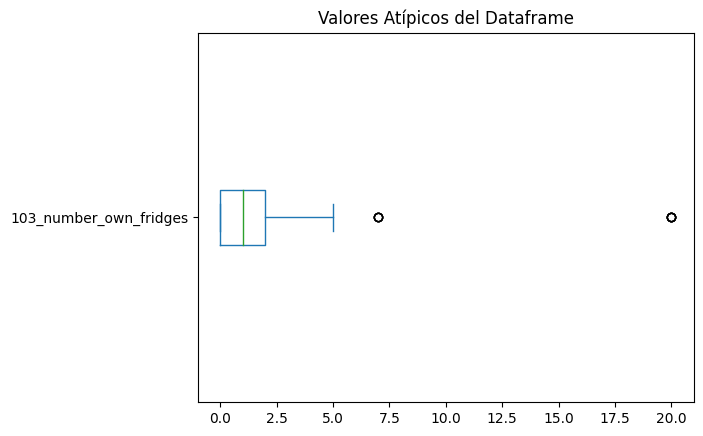

In [230]:
fig = plt.figure(figsize =(15, 8))
df3.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

##Metodo de desviacion estandar para eliminar Outliers

In [231]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df3
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 103_number_own_fridges    12.234973
dtype: float64
Limite inferior permitido 103_number_own_fridges   -8.679418
dtype: float64


<ipython-input-231-5a2324ee559e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-231-5a2324ee559e>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-231-5a2324ee559e>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence

In [232]:
outliers= df3[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-232-b15fc7cf7ebd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= df3[(y>Limite_Superior)|(y<Limite_Inferior)]


,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df4= df3[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df4

<ipython-input-233-4cc95114d8ab>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df4= df3[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
valores_nulos=df4.isnull().sum()
valores_nulos

46_willingness_reorder_suppliers_variety                 171
99_does_the_micro_retailer_exhibits_products_outside_    171
6_change_employees_average_salary_last_year              171
20_reviews_finances_monthly                              171
18_sales_records                                         171
155_sales_registers_used_for                             171
103_number_own_fridges                                     5
210_sales_channels                                       171
189_payment_methods                                      171
28_prefered_payment_method                               171
214_customer_relationship_tools                          171
193_sales_planning_tools                                 171
60_services                                              171
69_why_not_services                                      171
311_topups                                               171
312_payment_of_utilities                                 171
313_home_deliveries     

In [235]:
df_clean=df4.copy()
df_clean=df_clean.fillna("faltan datos")
df_clean

,46_willingness_reorder_suppliers_variety,99_does_the_micro_retailer_exhibits_products_outside_,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,210_sales_channels,189_payment_methods,28_prefered_payment_method,...,193_sales_planning_tools,60_services,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers
0,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,1.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
1,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,1.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
2,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,1.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
3,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,1.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
4,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,1.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,2.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
167,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,2.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
168,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,2.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos
169,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,2.0,faltan datos,faltan datos,faltan datos,...,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos,faltan datos


In [236]:
valores_nulos=df_clean.isnull().sum().sum()
valores_nulos

0

##Extraccion de caracteristicas

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

In [84]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(filtro['99_does_the_micro_retailer_exhibits_products_outside_'])
table1

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [85]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [86]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


Text(0, 0.5, 'Frecuencia')

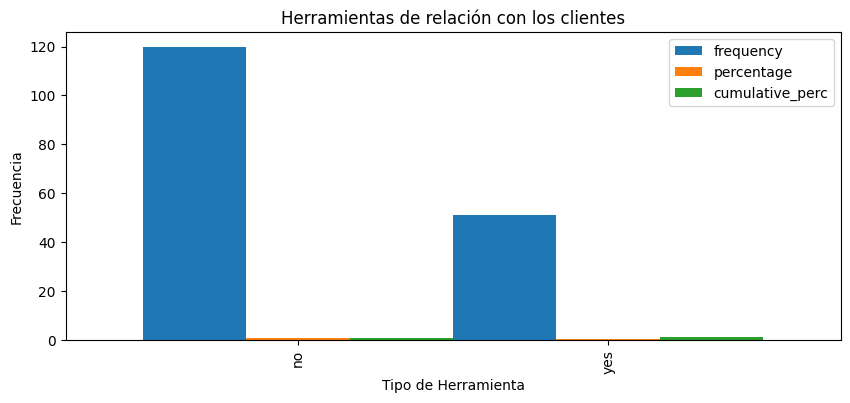

In [87]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

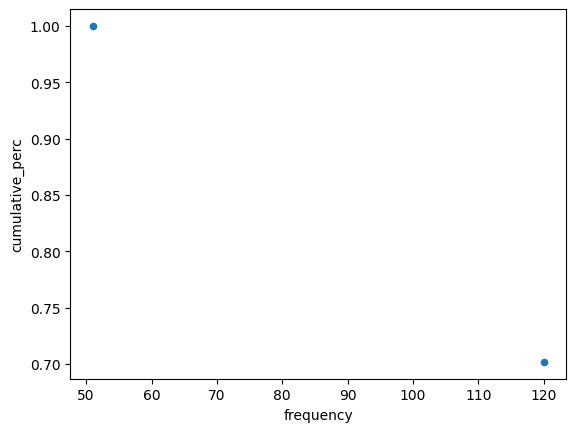

In [88]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: ylabel='frequency'>

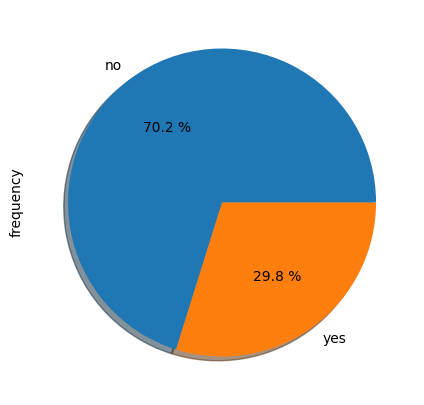

In [90]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [100]:
table2= freq_tbl(filtro['6_change_employees_average_salary_last_year'])
table2

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No cambió,50,0.292398,0.588235
1,Aumentó 15%,14,0.081871,0.752941
2,Disminuyó 15%,5,0.029240,0.811765
3,Aumentó 25%,4,0.023392,0.858824
4,Aumentó 50% o más,4,0.023392,0.905882
5,Disminuyó 25%,3,0.017544,0.941176
6,Dependiente,1,0.005848,0.952941
7,Disminuyó 50% o más,1,0.005848,0.964706
8,0,1,0.005848,0.976471
9,No hay empleándosela,1,0.005848,0.988235


In [104]:
Filtro2= table2[table2['cumulative_perc']>0.51]
Filtro2

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No cambió,50,0.292398,0.588235
1,Aumentó 15%,14,0.081871,0.752941
2,Disminuyó 15%,5,0.029240,0.811765
3,Aumentó 25%,4,0.023392,0.858824
4,Aumentó 50% o más,4,0.023392,0.905882
5,Disminuyó 25%,3,0.017544,0.941176
6,Dependiente,1,0.005848,0.952941
7,Disminuyó 50% o más,1,0.005848,0.964706
8,0,1,0.005848,0.976471
9,No hay empleándosela,1,0.005848,0.988235


In [105]:
Filtro2_index= Filtro2.set_index('6_change_employees_average_salary_last_year')
Filtro2_index

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
No cambió,50,0.292398,0.588235
Aumentó 15%,14,0.081871,0.752941
Disminuyó 15%,5,0.029240,0.811765
Aumentó 25%,4,0.023392,0.858824
Aumentó 50% o más,4,0.023392,0.905882
Disminuyó 25%,3,0.017544,0.941176
Dependiente,1,0.005848,0.952941
Disminuyó 50% o más,1,0.005848,0.964706
0,1,0.005848,0.976471


<Axes: xlabel='6_change_employees_average_salary_last_year'>

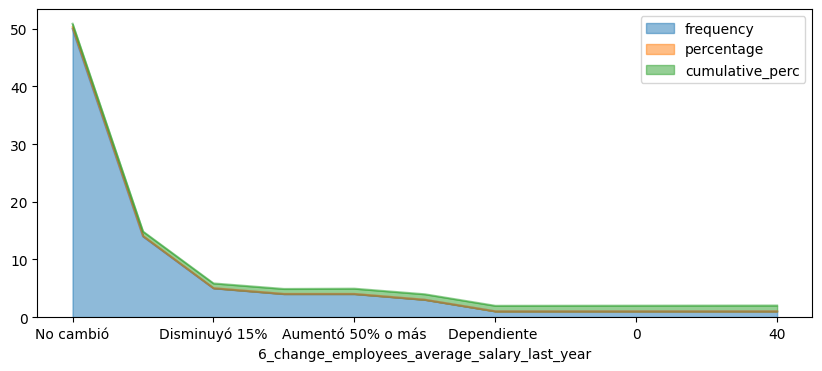

In [108]:
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [111]:
table3= freq_tbl(filtro['20_reviews_finances_monthly'])
table3

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,79,0.461988,0.731481
1,no,29,0.169591,1.000000


In [112]:
Filtro3= table3[table3['percentage']>0.10]
Filtro3

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,79,0.461988,0.731481
1,no,29,0.169591,1.000000


In [113]:
Filtro3_index= Filtro3.set_index('20_reviews_finances_monthly')
Filtro3_index

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,79,0.461988,0.731481
no,29,0.169591,1.000000


Text(0, 0.5, 'Frecuencia')

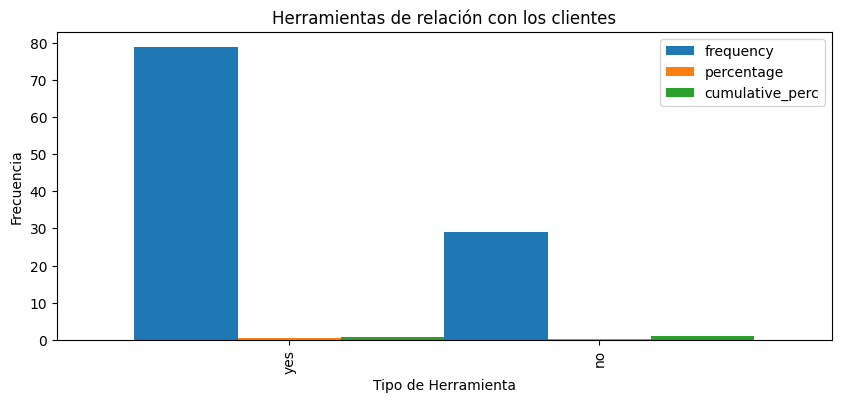

In [114]:
Filtro3_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

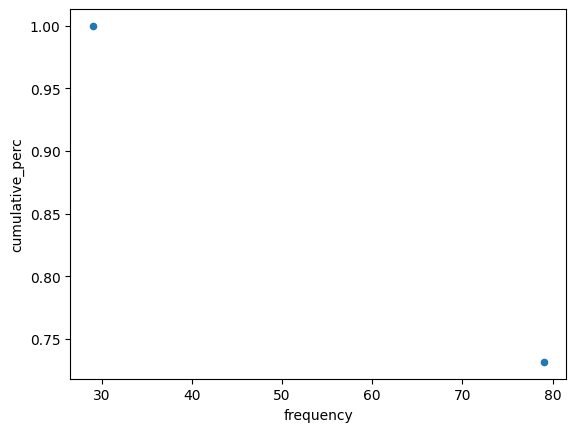

In [115]:
Filtro3_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='20_reviews_finances_monthly'>

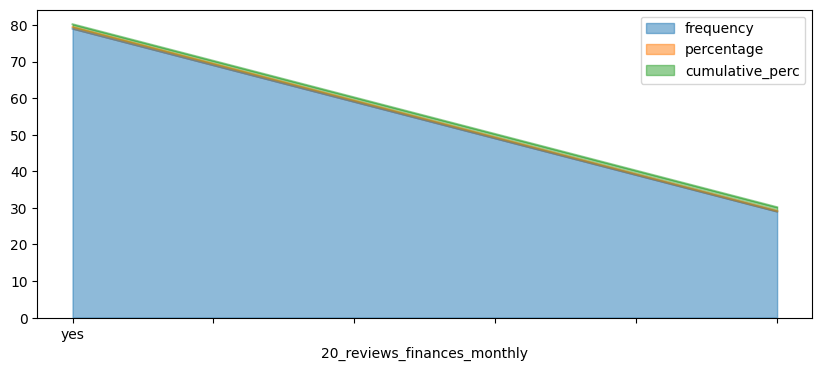

In [116]:
Filtro3_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

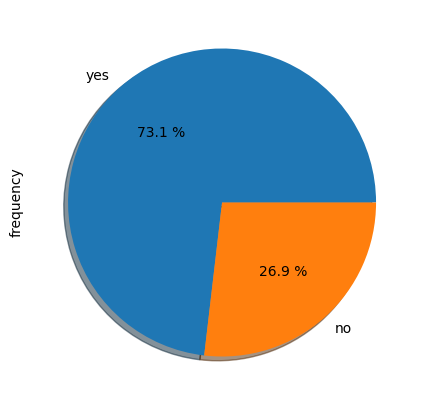

In [117]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

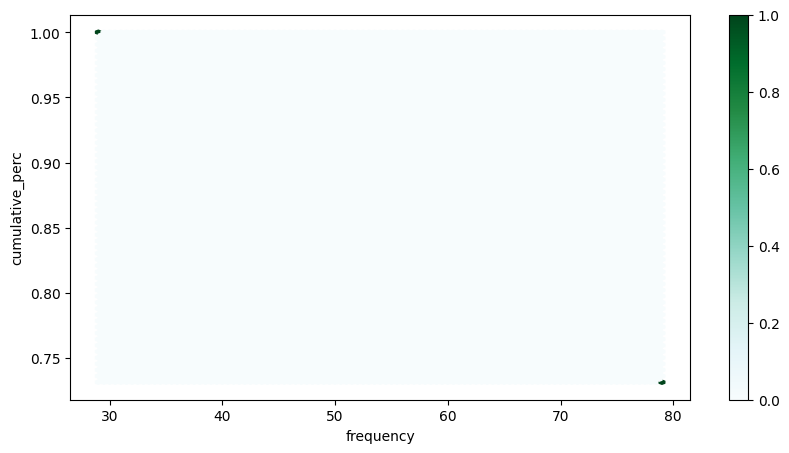

In [118]:
Filtro3_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [119]:
table4= freq_tbl(filtro['18_sales_records'])
table4

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,47,0.274854,0.427273
1,Software especializado + computadora,22,0.128655,0.627273
2,No lo hago,14,0.081871,0.754545
3,En Excel,10,0.058480,0.845455
4,Caja registradora (análoga),4,0.023392,0.881818
5,"En Excel,En papel",4,0.023392,0.918182
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.927273
7,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.936364
8,Contadora,1,0.005848,0.945455
9,Notas,1,0.005848,0.954545


In [120]:
Filtro4= table4[table4['frequency']>1]
Filtro4

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,47,0.274854,0.427273
1,Software especializado + computadora,22,0.128655,0.627273
2,No lo hago,14,0.081871,0.754545
3,En Excel,10,0.058480,0.845455
4,Caja registradora (análoga),4,0.023392,0.881818
5,"En Excel,En papel",4,0.023392,0.918182


In [121]:
Filtro4_index= Filtro4.set_index('18_sales_records')
Filtro4_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,47,0.274854,0.427273
Software especializado + computadora,22,0.128655,0.627273
No lo hago,14,0.081871,0.754545
En Excel,10,0.058480,0.845455
Caja registradora (análoga),4,0.023392,0.881818
"En Excel,En papel",4,0.023392,0.918182


Text(0, 0.5, 'Frecuencia')

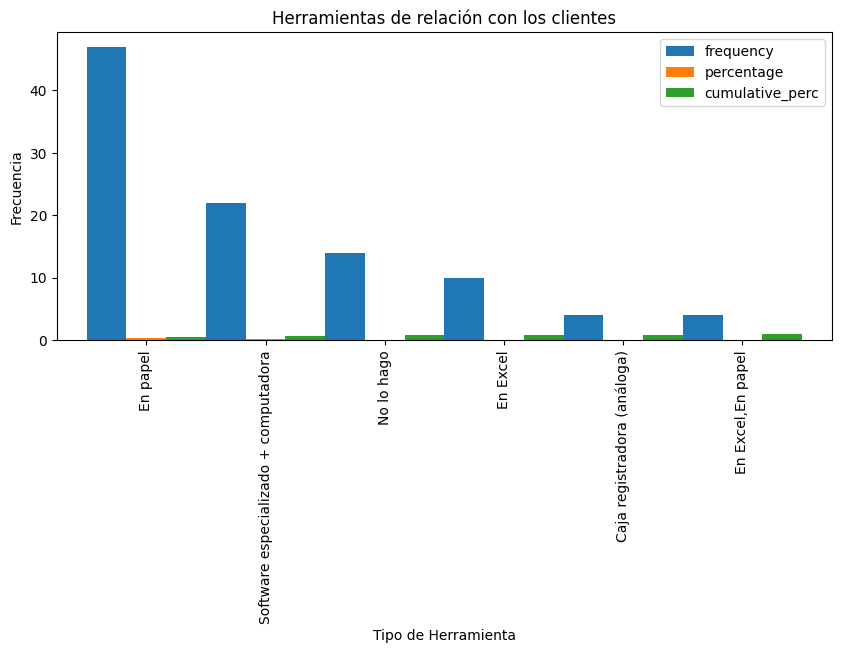

In [122]:
Filtro4_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

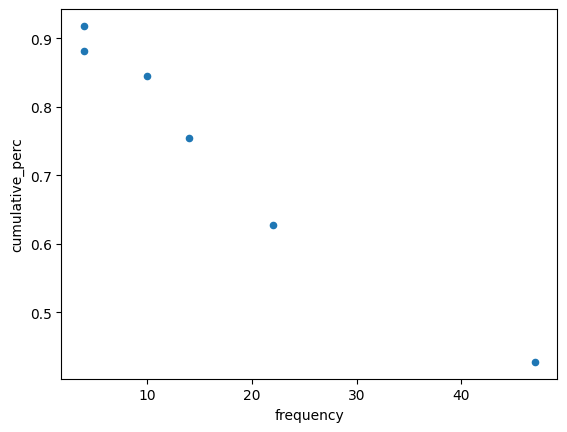

In [123]:
Filtro4_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='99_does_the_micro_retailer_exhibits_products_outside_'>

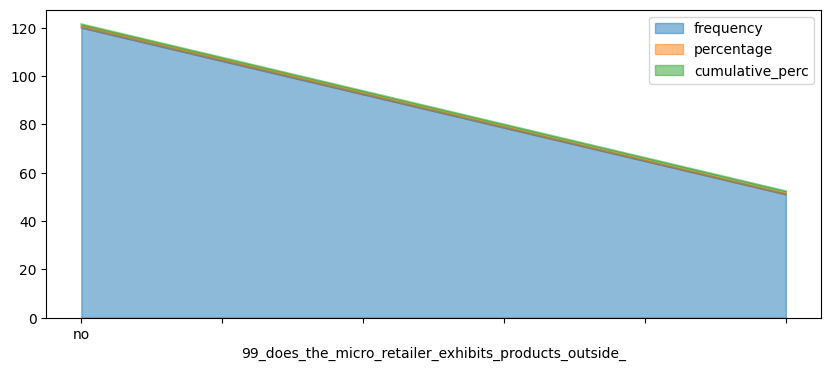

In [124]:
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

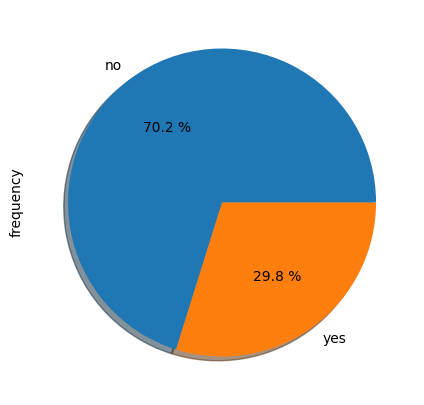

In [125]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [127]:
table5= freq_tbl(filtro['155_sales_registers_used_for'])
table5

,155_sales_registers_used_for,frequency,percentage,cumulative_perc
0,No los uso,4,0.023392,0.666667
1,Se lleva al día,1,0.005848,0.833333
2,PEPS,1,0.005848,1.000000


In [128]:
Filtro5= table5[table5['cumulative_perc']>0.5]
Filtro5

,155_sales_registers_used_for,frequency,percentage,cumulative_perc
0,No los uso,4,0.023392,0.666667
1,Se lleva al día,1,0.005848,0.833333
2,PEPS,1,0.005848,1.000000


In [129]:
Filtro5_index= Filtro5.set_index('155_sales_registers_used_for')
Filtro5_index

,frequency,percentage,cumulative_perc
155_sales_registers_used_for,,,
No los uso,4,0.023392,0.666667
Se lleva al día,1,0.005848,0.833333
PEPS,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

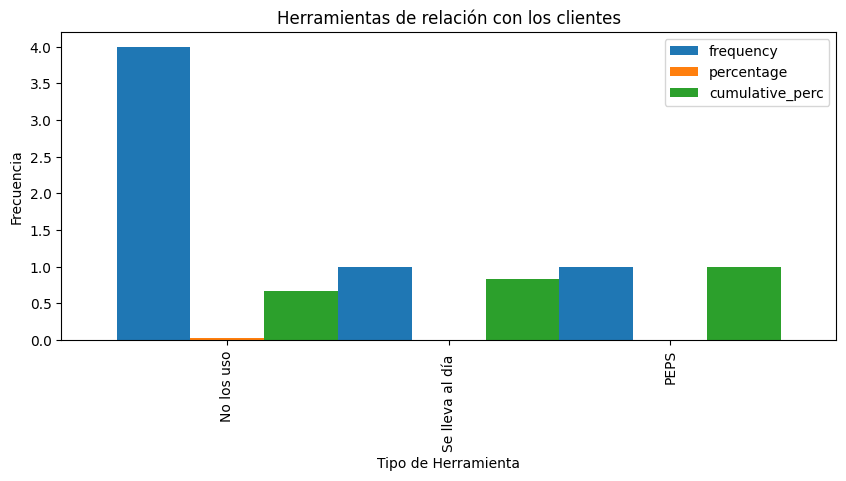

In [130]:
Filtro5_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

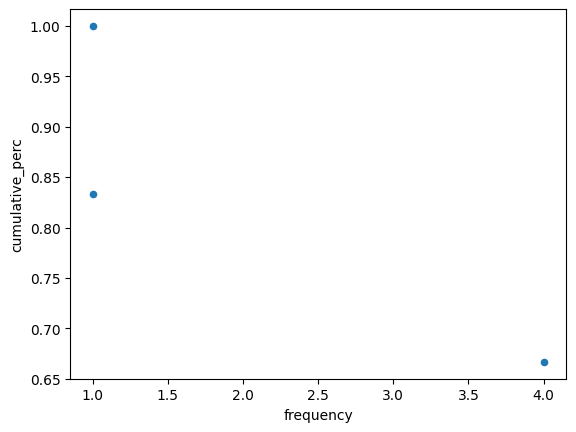

In [131]:
Filtro5_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='155_sales_registers_used_for'>

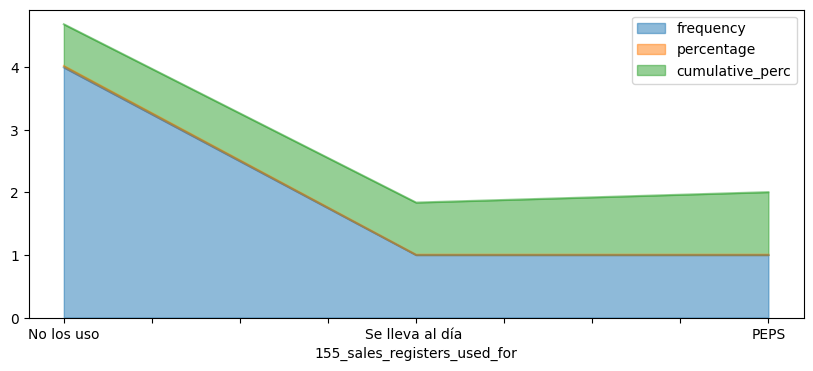

In [132]:
Filtro5_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

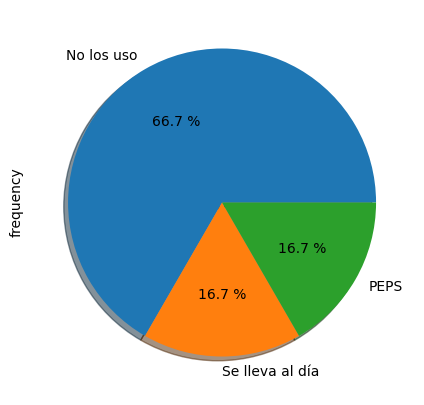

In [133]:
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table6= freq_tbl(filtro['46_willingness_reorder_suppliers_variety'])
table6


In [217]:
Filtro6= table6[table6['frequency']>5]
Filtro6

,46_willingness_reorder_suppliers_variety,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,33,0.192982,0.445946
1,Totalmente de acuerdo,15,0.087719,0.648649
2,Algo de acuerdo,14,0.081871,0.837838
3,Algo en desacuerdo,7,0.040936,0.932432


In [218]:
Filtro6_index= Filtro6.set_index('46_willingness_reorder_suppliers_variety')
Filtro6_index

,frequency,percentage,cumulative_perc
46_willingness_reorder_suppliers_variety,,,
Totalmente en desacuerdo,33,0.192982,0.445946
Totalmente de acuerdo,15,0.087719,0.648649
Algo de acuerdo,14,0.081871,0.837838
Algo en desacuerdo,7,0.040936,0.932432


Text(0, 0.5, 'Frecuencia')

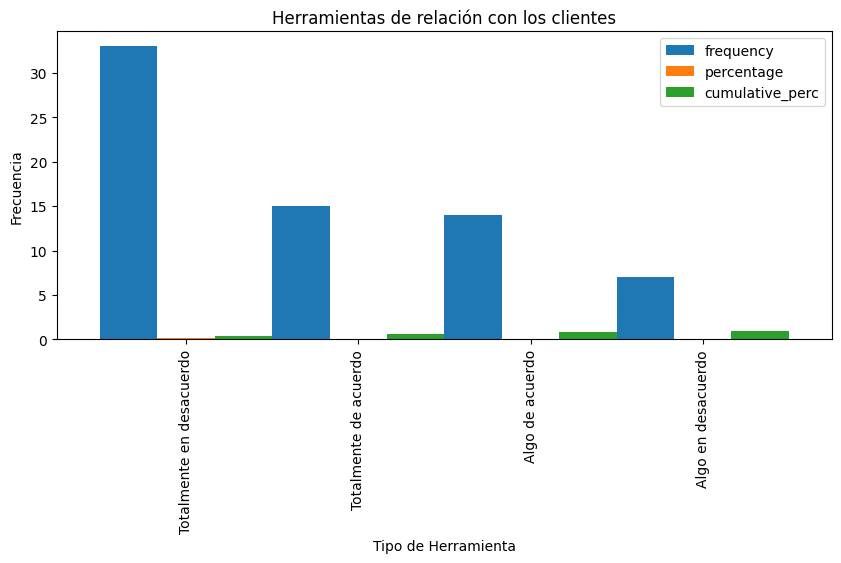

In [219]:
#Realizamos grafico de barras del dataframe filtrado
Filtro6_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [136]:
table7= freq_tbl(filtro['210_sales_channels'])
table7

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.134146
1,WhatsApp,10,0.058480,0.256098
2,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.365854
3,Llamada a Teléfono fijo,6,0.035088,0.439024
4,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.512195
5,Llamada a Teléfono celular,5,0.029240,0.573171
6,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.634146
7,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.670732
8,Ninguno,3,0.017544,0.707317
9,Página web propia,3,0.017544,0.743902


In [137]:
Filtro7= table7[table7['cumulative_perc']>0.8]
Filtro7

,210_sales_channels,frequency,percentage,cumulative_perc
12,"Llamada a Teléfono fijo,WhatsApp",1,0.005848,0.804878
13,Solo físico,1,0.005848,0.817073
14,"Llamada a Teléfono celular,Llamada a Teléfono ...",1,0.005848,0.829268
15,"Página web propia,WhatsApp",1,0.005848,0.841463
16,"Llamada a Teléfono celular,Llamada a Teléfono ...",1,0.005848,0.853659
17,"Aplicación móvil (e.g. Rappi, Uber Eats),Llama...",1,0.005848,0.865854
18,"Aplicación móvil (e.g. Rappi, Uber Eats),Llama...",1,0.005848,0.878049
19,"Llamada a Teléfono fijo,Redes sociales (e.g. F...",1,0.005848,0.890244
20,conocidos paquetes cerrados,1,0.005848,0.902439
21,"Página web propia,Redes sociales (e.g. Faceboo...",1,0.005848,0.914634


In [138]:
Filtro7_index= Filtro7.set_index('210_sales_channels')
Filtro7_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
"Llamada a Teléfono fijo,WhatsApp",1,0.005848,0.804878
Solo físico,1,0.005848,0.817073
"Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram)",1,0.005848,0.829268
"Página web propia,WhatsApp",1,0.005848,0.841463
"Llamada a Teléfono celular,Llamada a Teléfono fijo,Página web propia,Redes sociales (e.g. Facebook, Instagram),WhatsApp",1,0.005848,0.853659
"Aplicación móvil (e.g. Rappi, Uber Eats),Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp",1,0.005848,0.865854
"Aplicación móvil (e.g. Rappi, Uber Eats),Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram)",1,0.005848,0.878049
"Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp",1,0.005848,0.890244
conocidos paquetes cerrados,1,0.005848,0.902439


Text(0, 0.5, 'Frecuencia')

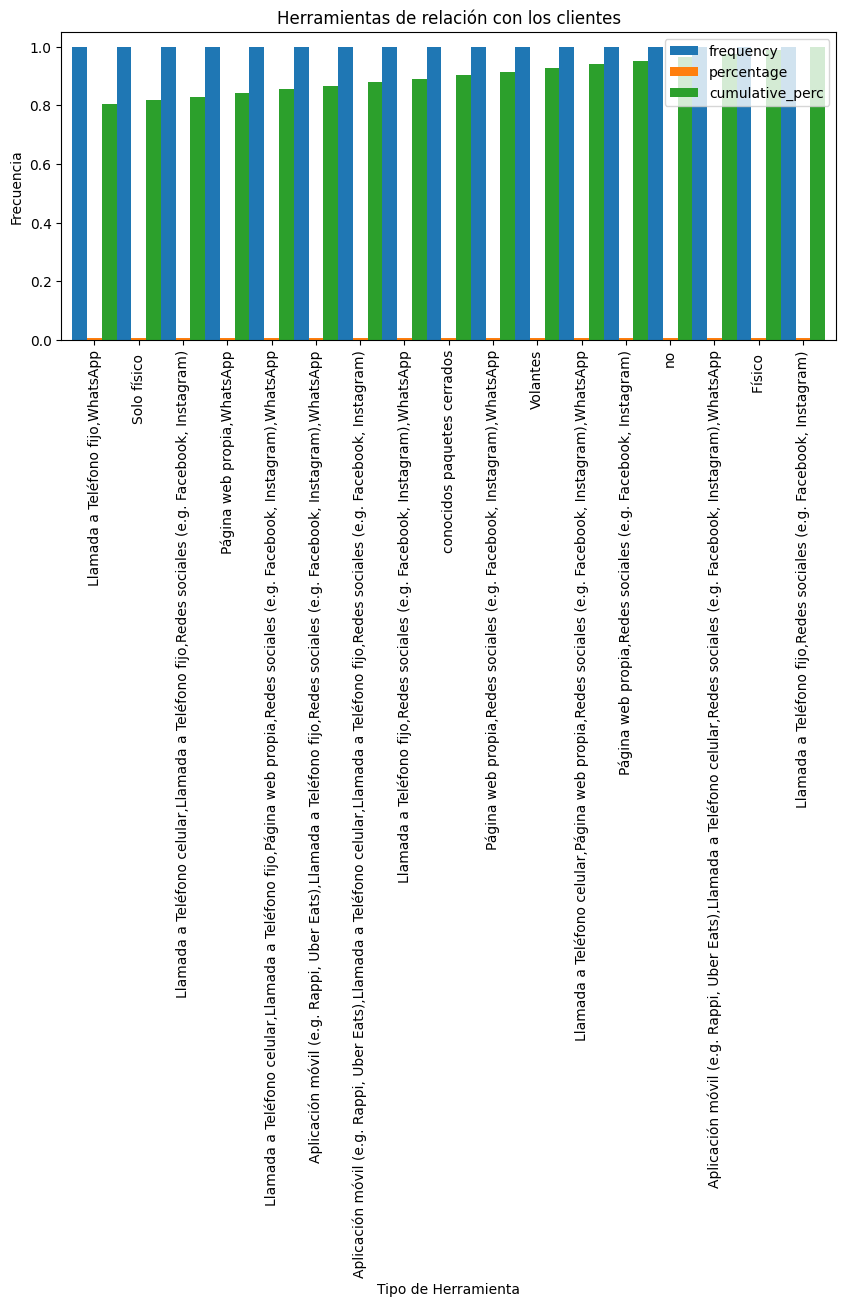

In [139]:
Filtro7_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

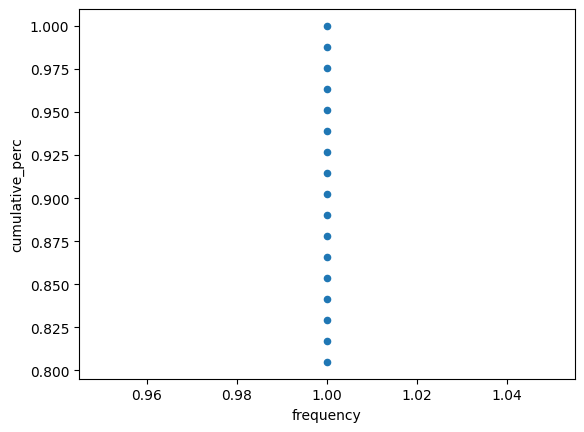

In [140]:
Filtro7_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='210_sales_channels'>

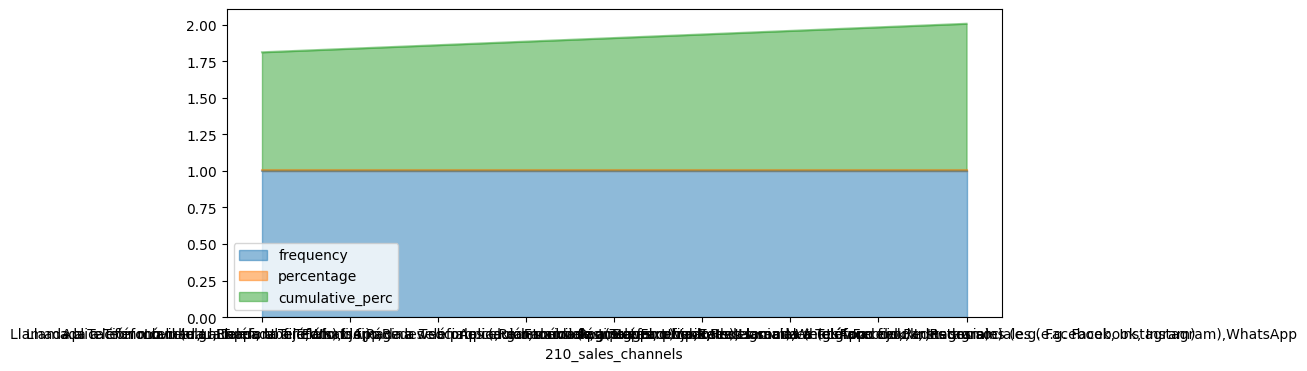

In [141]:
Filtro7_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

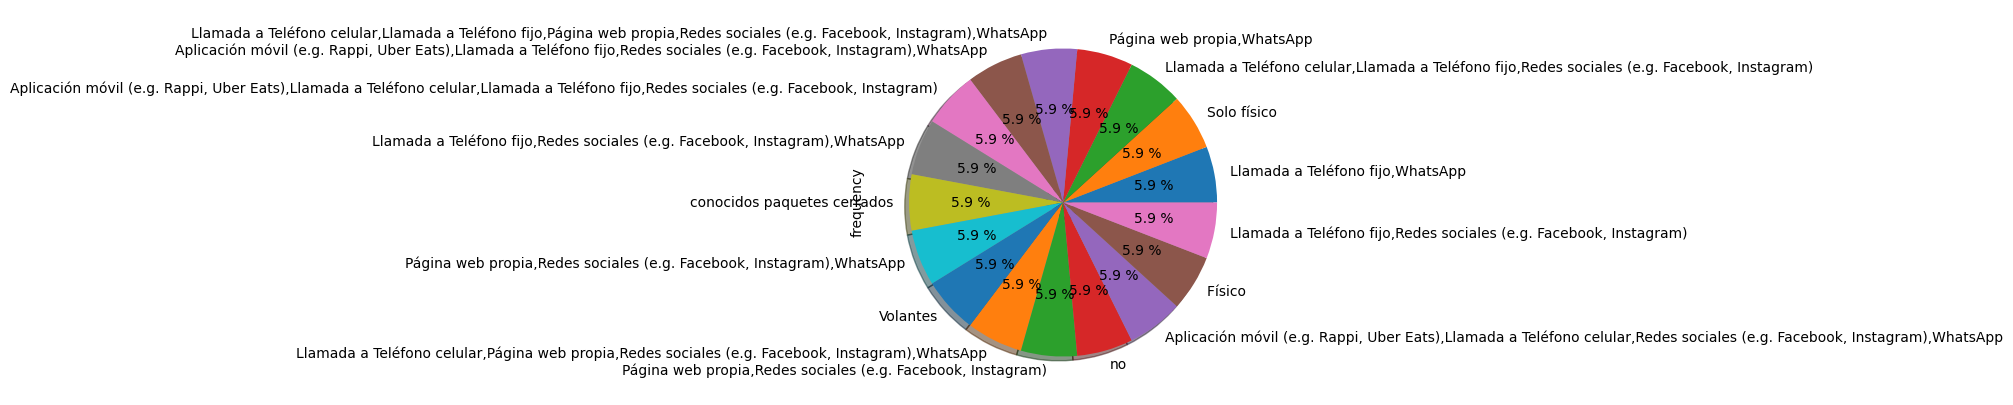

In [142]:
Filtro7_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

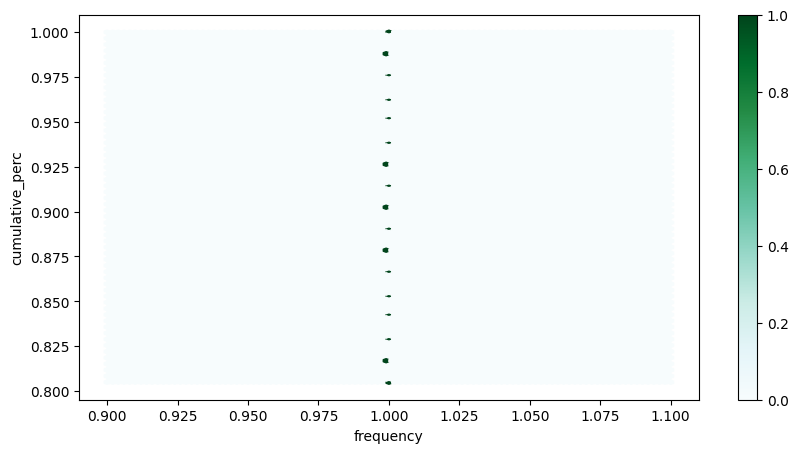

In [143]:
Filtro7_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [144]:
table8= freq_tbl(filtro['189_payment_methods'])
table8

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,40,0.233918,0.373832
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.654206
2,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.831776
3,"Efectivo,Transferencia interbancaria",15,0.087719,0.971963
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.981308
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.990654
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [146]:
Filtro8= table8[table8['frequency']>=15]
Filtro8

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,40,0.233918,0.373832
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.654206
2,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.831776
3,"Efectivo,Transferencia interbancaria",15,0.087719,0.971963


In [147]:
Filtro8_index= Filtro8.set_index('189_payment_methods')
Filtro8_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,40,0.233918,0.373832
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.654206
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.831776
"Efectivo,Transferencia interbancaria",15,0.087719,0.971963


Text(0, 0.5, 'Frecuencia')

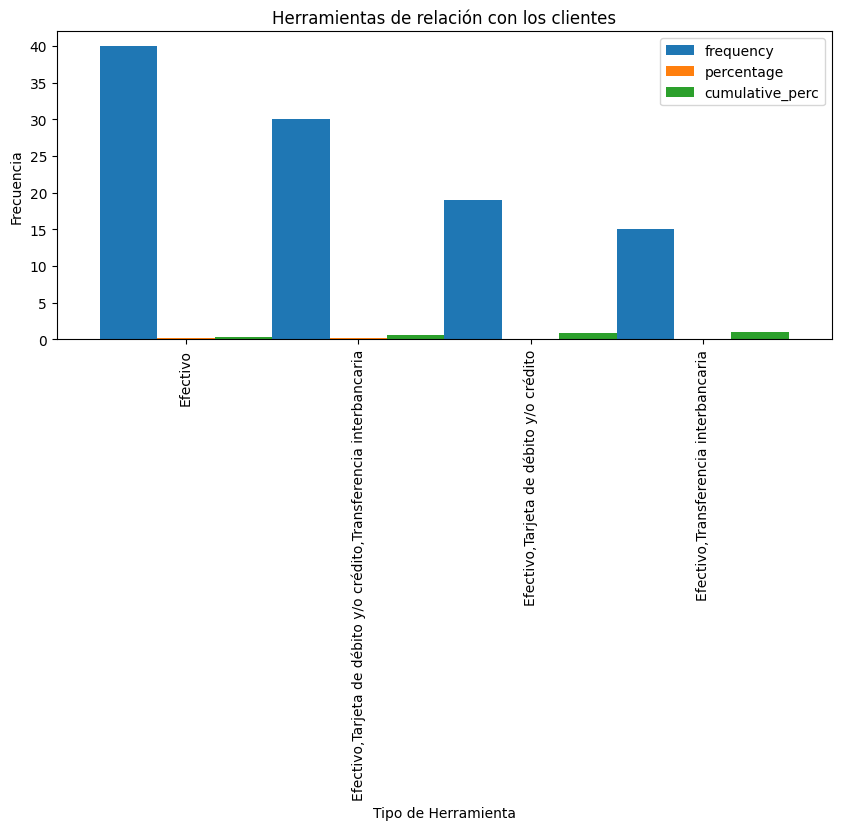

In [148]:
Filtro8_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

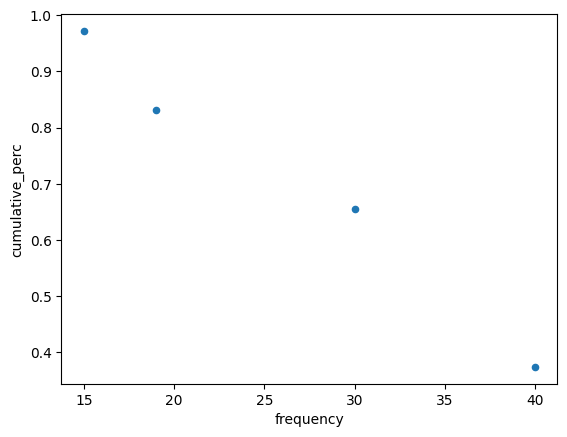

In [149]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro8_index.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: xlabel='189_payment_methods'>

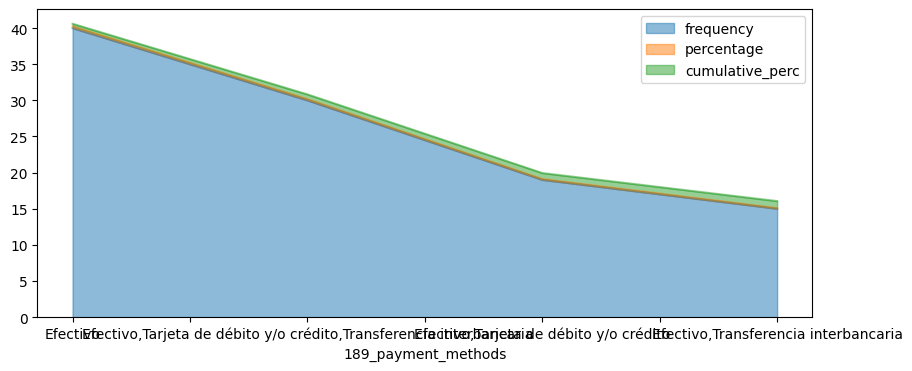

In [150]:
#Realizamos grafico de área del dataframe filtrado
Filtro8_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

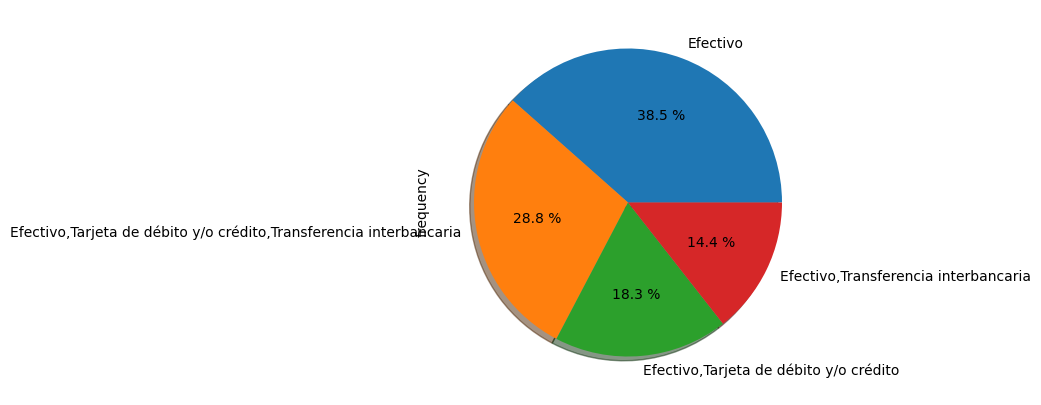

In [151]:
Filtro8_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

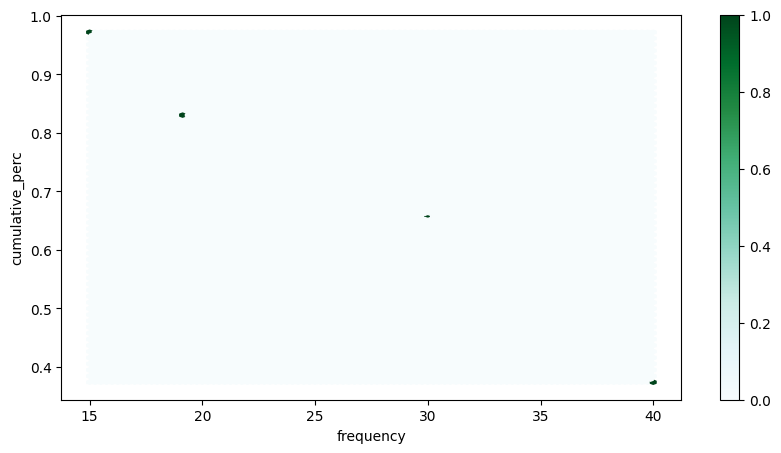

In [152]:
Filtro8_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [153]:
table9= freq_tbl(filtro['28_prefered_payment_method'])
table9

,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Tarjeta de débito y/o crédito,1,0.005848,0.5
1,Efectivo,1,0.005848,1.0


In [154]:
Filtro9= table9[table9['frequency']==1]
Filtro9

,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Tarjeta de débito y/o crédito,1,0.005848,0.5
1,Efectivo,1,0.005848,1.0


In [155]:
#Ajusto el indice de mi dataframe
Filtro9_index= Filtro9.set_index('28_prefered_payment_method')
Filtro9_index

,frequency,percentage,cumulative_perc
28_prefered_payment_method,,,
Tarjeta de débito y/o crédito,1,0.005848,0.5
Efectivo,1,0.005848,1.0


<Axes: ylabel='percentage'>

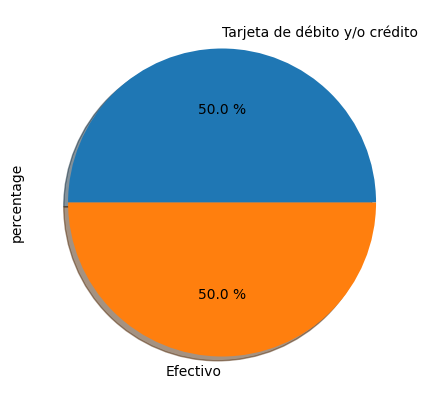

In [157]:
Filtro9_index["percentage"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [158]:
table10= freq_tbl(filtro['214_customer_relationship_tools'])
table10

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789
5,Teléfono,1,0.005848,0.926316
6,"Cuaderno,Redes sociales",1,0.005848,0.936842
7,"Aplicación móvil,De frente",1,0.005848,0.947368
8,Físico,1,0.005848,0.957895
9,"Aplicación móvil,Ninguna",1,0.005848,0.968421


In [159]:
Filtro10= table10[table10['frequency']>1]
Filtro10

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789


In [160]:
Filtro10_index= Filtro10.set_index('214_customer_relationship_tools')
Filtro10_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,27,0.157895,0.284211
Aplicación móvil,21,0.122807,0.505263
Ninguna,20,0.116959,0.715789
"Aplicación móvil,Redes sociales",13,0.076023,0.852632
Cuaderno,6,0.035088,0.915789


<Axes: xlabel='214_customer_relationship_tools'>

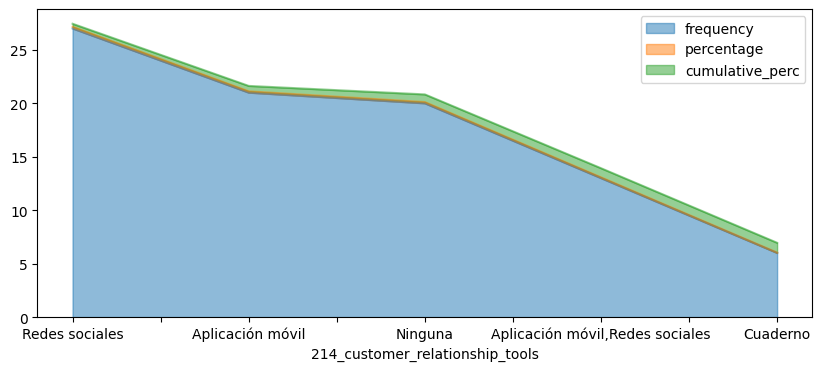

In [161]:
Filtro10_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [162]:
table11= freq_tbl(filtro['193_sales_planning_tools'])
table11

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,33,0.192982,0.402439
1,Cuaderno,21,0.122807,0.658537
2,Software especializado,6,0.035088,0.731707
3,Excel,6,0.035088,0.804878
4,"Cuaderno,Excel",3,0.017544,0.841463
5,"Cuaderno,Ninguna",2,0.011696,0.865854
6,Other,1,0.005848,0.878049
7,Mental,1,0.005848,0.890244
8,Por temporada de pan,1,0.005848,0.902439
9,Sobre demanda,1,0.005848,0.914634


In [163]:
Filtro11= table11[table11['frequency']>=6]
Filtro11

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,33,0.192982,0.402439
1,Cuaderno,21,0.122807,0.658537
2,Software especializado,6,0.035088,0.731707
3,Excel,6,0.035088,0.804878


In [164]:
Filtro11_index= Filtro11.set_index('193_sales_planning_tools')
Filtro11_index

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Ninguna,33,0.192982,0.402439
Cuaderno,21,0.122807,0.658537
Software especializado,6,0.035088,0.731707
Excel,6,0.035088,0.804878


<Axes: ylabel='frequency'>

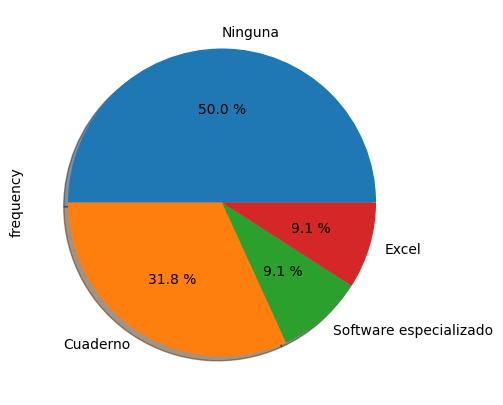

In [166]:
Filtro11_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [167]:
table12= freq_tbl(filtro['60_services'])
table12

,60_services,frequency,percentage,cumulative_perc
0,Ninguno,44,0.257310,0.571429
1,Entrega a domicilio,15,0.087719,0.766234
2,Recarga telefónica,7,0.040936,0.857143
3,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.883117
4,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.909091
5,Toma de papa nicolau,1,0.005848,0.922078
6,Renta de local,1,0.005848,0.935065
7,venta,1,0.005848,0.948052
8,"Entrega a domicilio,Recarga telefónica,Recepci...",1,0.005848,0.961039
9,"Entrega a domicilio,Pago de servicios públicos...",1,0.005848,0.974026


In [169]:
Filtro12= table12[table12['cumulative_perc']>0.9]
Filtro12

,60_services,frequency,percentage,cumulative_perc
4,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.909091
5,Toma de papa nicolau,1,0.005848,0.922078
6,Renta de local,1,0.005848,0.935065
7,venta,1,0.005848,0.948052
8,"Entrega a domicilio,Recarga telefónica,Recepci...",1,0.005848,0.961039
9,"Entrega a domicilio,Pago de servicios públicos...",1,0.005848,0.974026
10,"Pago de servicios públicos (e.g. Yastas),Recar...",1,0.005848,0.987013
11,"Recepción y entrega de paquetes (e.g. Amazon, ...",1,0.005848,1.000000


In [170]:
Filtro12_index= Filtro12.set_index('60_services')
Filtro12_index

,frequency,percentage,cumulative_perc
60_services,,,
"Entrega a domicilio,Recarga telefónica",2,0.011696,0.909091
Toma de papa nicolau,1,0.005848,0.922078
Renta de local,1,0.005848,0.935065
venta,1,0.005848,0.948052
"Entrega a domicilio,Recarga telefónica,Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)",1,0.005848,0.961039
"Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica,Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)",1,0.005848,0.974026
"Pago de servicios públicos (e.g. Yastas),Recarga telefónica",1,0.005848,0.987013
"Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)",1,0.005848,1.000000


<Axes: xlabel='60_services'>

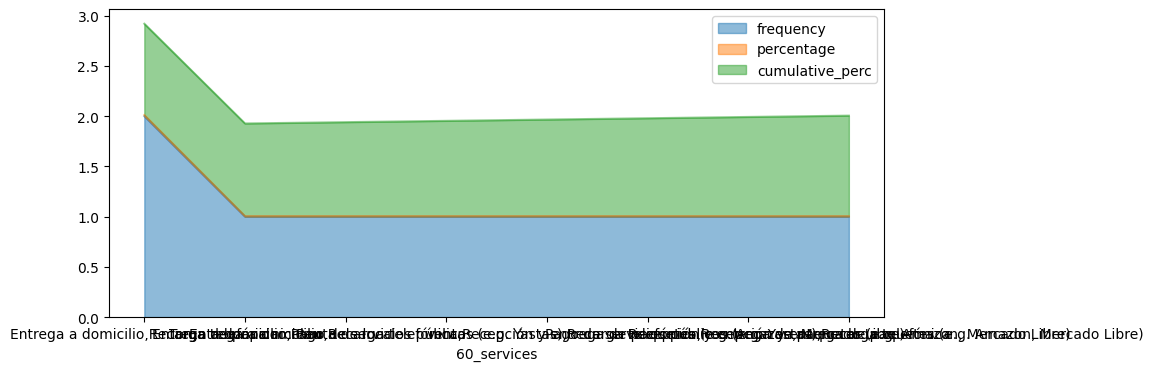

In [173]:
Filtro12_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [ ]:
table13= freq_tbl(filtro['69_why_not_services'])
table13

In [175]:
Filtro13= table13[table13['cumulative_perc']>0.7]
Filtro13

,69_why_not_services,frequency,percentage,cumulative_perc
7,Se quiere involucrar,1,0.005848,0.707317
8,Se vende ropa,1,0.005848,0.731707
9,"Es muy caro,No conozco los servicios,No creo q...",1,0.005848,0.756098
10,no estamos listos,1,0.005848,0.780488
11,mo lo vale,1,0.005848,0.804878
12,"Es muy caro,No creo que represente grandes ing...",1,0.005848,0.829268
13,no lo vale,1,0.005848,0.853659
14,Es exclusivo panadería,1,0.005848,0.878049
15,Pura taqueria,1,0.005848,0.902439
16,Apenas son nuevos,1,0.005848,0.926829


In [176]:
Filtro13_index= Filtro13.set_index('69_why_not_services')
Filtro13_index

,frequency,percentage,cumulative_perc
69_why_not_services,,,
Se quiere involucrar,1,0.005848,0.707317
Se vende ropa,1,0.005848,0.731707
"Es muy caro,No conozco los servicios,No creo que represente grandes ingresos",1,0.005848,0.756098
no estamos listos,1,0.005848,0.780488
mo lo vale,1,0.005848,0.804878
"Es muy caro,No creo que represente grandes ingresos,pérdidas",1,0.005848,0.829268
no lo vale,1,0.005848,0.853659
Es exclusivo panadería,1,0.005848,0.878049
Pura taqueria,1,0.005848,0.902439


Text(0, 0.5, 'Frecuencia')

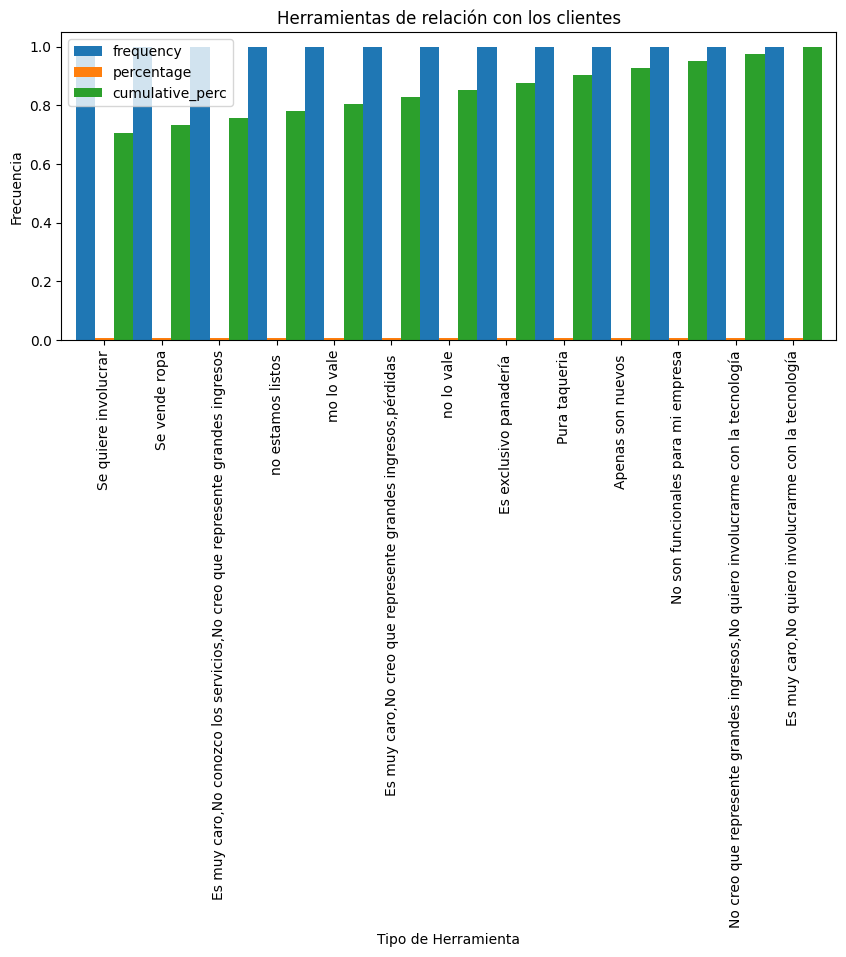

In [177]:
Filtro13_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [178]:
table14= freq_tbl(filtro['311_topups'])
table14

,311_topups,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,32,0.187135,0.561404
1,Totalmente de acuerdo,13,0.076023,0.789474
2,Algo en desacuerdo,4,0.023392,0.859649
3,Algo de acuerdo,4,0.023392,0.929825
4,Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


In [180]:
Filtro14= table14[table14['frequency']>=4]
Filtro14

,311_topups,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,32,0.187135,0.561404
1,Totalmente de acuerdo,13,0.076023,0.789474
2,Algo en desacuerdo,4,0.023392,0.859649
3,Algo de acuerdo,4,0.023392,0.929825
4,Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


In [181]:
Filtro14_index= Filtro14.set_index('311_topups')
Filtro14_index

,frequency,percentage,cumulative_perc
311_topups,,,
Totalmente en desacuerdo,32,0.187135,0.561404
Totalmente de acuerdo,13,0.076023,0.789474
Algo en desacuerdo,4,0.023392,0.859649
Algo de acuerdo,4,0.023392,0.929825
Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


<Axes: ylabel='frequency'>

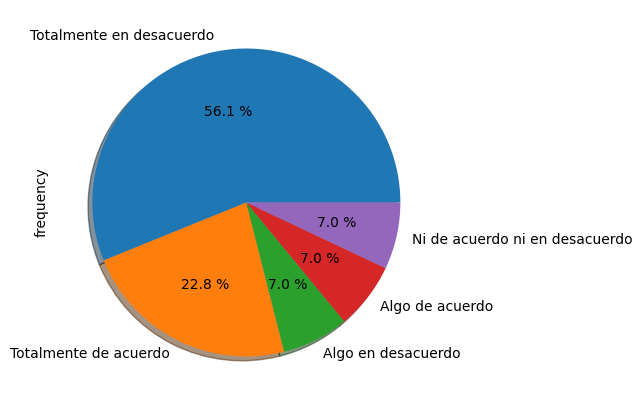

In [182]:
Filtro14_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [184]:
table15= freq_tbl(filtro['312_payment_of_utilities'])
table15

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.696970
1,Totalmente de acuerdo,9,0.052632,0.833333
2,Algo de acuerdo,5,0.029240,0.909091
3,Ni de acuerdo ni en desacuerdo,4,0.023392,0.969697
4,Algo en desacuerdo,2,0.011696,1.000000


In [185]:
Filtro15= table15[table15['frequency']>1]
Filtro15

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.696970
1,Totalmente de acuerdo,9,0.052632,0.833333
2,Algo de acuerdo,5,0.029240,0.909091
3,Ni de acuerdo ni en desacuerdo,4,0.023392,0.969697
4,Algo en desacuerdo,2,0.011696,1.000000


In [186]:
Filtro15_index= Filtro15.set_index('312_payment_of_utilities')
Filtro15_index

,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
Totalmente en desacuerdo,46,0.269006,0.696970
Totalmente de acuerdo,9,0.052632,0.833333
Algo de acuerdo,5,0.029240,0.909091
Ni de acuerdo ni en desacuerdo,4,0.023392,0.969697
Algo en desacuerdo,2,0.011696,1.000000


<Axes: ylabel='frequency'>

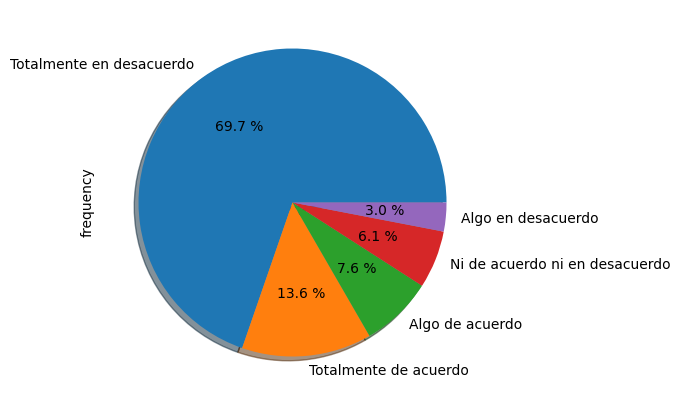

In [187]:
Filtro15_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [188]:
table16= freq_tbl(filtro['313_home_deliveries'])
table16

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,25,0.146199,0.431034
1,Totalmente de acuerdo,14,0.081871,0.672414
2,Algo de acuerdo,11,0.064327,0.862069
3,Algo en desacuerdo,5,0.029240,0.948276
4,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [191]:
Filtro16= table16[table16['frequency']>1]
Filtro16

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,25,0.146199,0.431034
1,Totalmente de acuerdo,14,0.081871,0.672414
2,Algo de acuerdo,11,0.064327,0.862069
3,Algo en desacuerdo,5,0.029240,0.948276
4,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [194]:
Filtro16_index= Filtro16.set_index('313_home_deliveries')
Filtro16_index

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Totalmente en desacuerdo,25,0.146199,0.431034
Totalmente de acuerdo,14,0.081871,0.672414
Algo de acuerdo,11,0.064327,0.862069
Algo en desacuerdo,5,0.029240,0.948276
Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

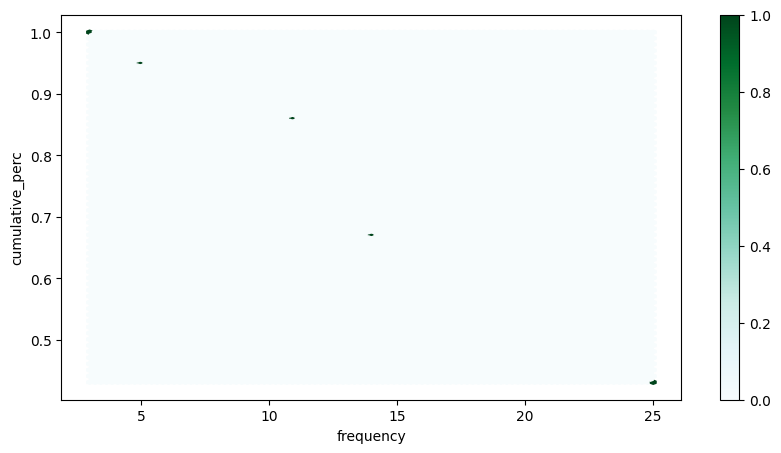

In [195]:
Filtro16_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [196]:
table17= freq_tbl(filtro['314_reception_delivery_packages'])
table17

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.676471
1,Algo de acuerdo,9,0.052632,0.808824
2,Totalmente de acuerdo,8,0.046784,0.926471
3,Ni de acuerdo ni en desacuerdo,3,0.017544,0.970588
4,Algo en desacuerdo,2,0.011696,1.000000


In [197]:
Filtro17= table17[table17['frequency']>1]
Filtro17

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,46,0.269006,0.676471
1,Algo de acuerdo,9,0.052632,0.808824
2,Totalmente de acuerdo,8,0.046784,0.926471
3,Ni de acuerdo ni en desacuerdo,3,0.017544,0.970588
4,Algo en desacuerdo,2,0.011696,1.000000


In [199]:
Filtro17_index= Filtro17.set_index('314_reception_delivery_packages')
Filtro17_index

,frequency,percentage,cumulative_perc
314_reception_delivery_packages,,,
Totalmente en desacuerdo,46,0.269006,0.676471
Algo de acuerdo,9,0.052632,0.808824
Totalmente de acuerdo,8,0.046784,0.926471
Ni de acuerdo ni en desacuerdo,3,0.017544,0.970588
Algo en desacuerdo,2,0.011696,1.000000


<Axes: xlabel='314_reception_delivery_packages'>

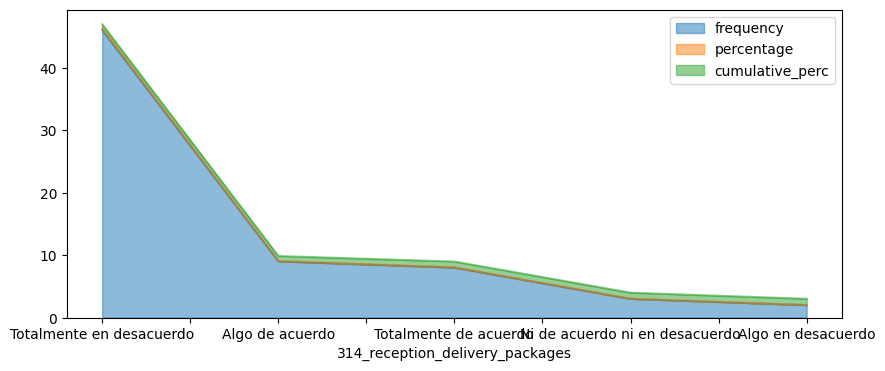

In [200]:
Filtro17_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [201]:
table18= freq_tbl(filtro['42_willingness_share_inventory_data_suppliers'])
table18

,42_willingness_share_inventory_data_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,49,0.286550,0.6125
1,Algo de acuerdo,13,0.076023,0.7750
2,Algo en desacuerdo,8,0.046784,0.8750
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.9500
4,Totalmente de acuerdo,4,0.023392,1.0000


In [202]:
Filtro18= table18[table18['frequency']>1]
Filtro18

,42_willingness_share_inventory_data_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,49,0.286550,0.6125
1,Algo de acuerdo,13,0.076023,0.7750
2,Algo en desacuerdo,8,0.046784,0.8750
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.9500
4,Totalmente de acuerdo,4,0.023392,1.0000


In [203]:
Filtro18_index= Filtro18.set_index('42_willingness_share_inventory_data_suppliers')
Filtro18_index

,frequency,percentage,cumulative_perc
42_willingness_share_inventory_data_suppliers,,,
Totalmente en desacuerdo,49,0.286550,0.6125
Algo de acuerdo,13,0.076023,0.7750
Algo en desacuerdo,8,0.046784,0.8750
Ni de acuerdo ni en desacuerdo,6,0.035088,0.9500
Totalmente de acuerdo,4,0.023392,1.0000


<Axes: xlabel='42_willingness_share_inventory_data_suppliers'>

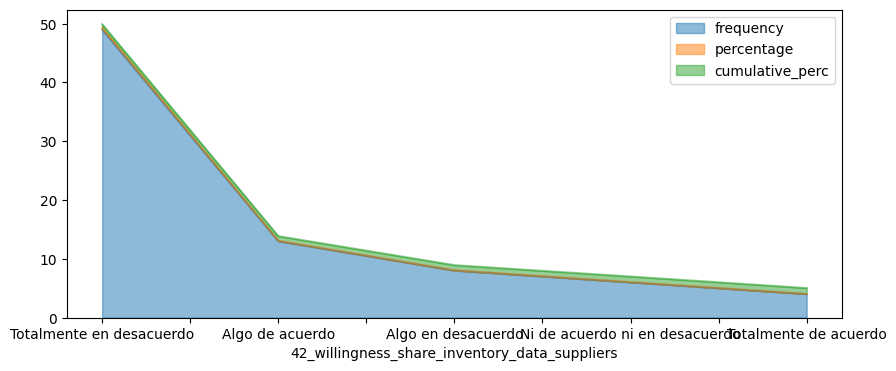

In [204]:
Filtro18_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [206]:
table19= freq_tbl(filtro['44_willingness_inventory_management_suppliers'])
table19

,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,58,0.339181,0.734177
1,Algo en desacuerdo,8,0.046784,0.835443
2,Ni de acuerdo ni en desacuerdo,5,0.029240,0.898734
3,Algo de acuerdo,5,0.029240,0.962025
4,Totalmente de acuerdo,3,0.017544,1.000000


In [207]:
Filtro19= table19[table19['frequency']>1]
Filtro19

,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,58,0.339181,0.734177
1,Algo en desacuerdo,8,0.046784,0.835443
2,Ni de acuerdo ni en desacuerdo,5,0.029240,0.898734
3,Algo de acuerdo,5,0.029240,0.962025
4,Totalmente de acuerdo,3,0.017544,1.000000


In [208]:
Filtro19_index= Filtro19.set_index('44_willingness_inventory_management_suppliers')
Filtro19_index

,frequency,percentage,cumulative_perc
44_willingness_inventory_management_suppliers,,,
Totalmente en desacuerdo,58,0.339181,0.734177
Algo en desacuerdo,8,0.046784,0.835443
Ni de acuerdo ni en desacuerdo,5,0.029240,0.898734
Algo de acuerdo,5,0.029240,0.962025
Totalmente de acuerdo,3,0.017544,1.000000


<Axes: ylabel='frequency'>

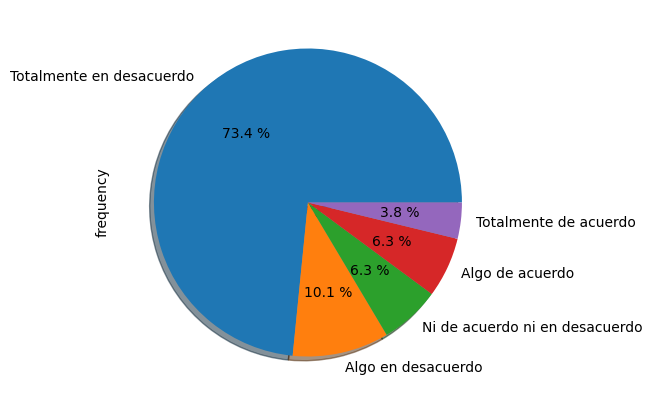

In [209]:
Filtro19_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [212]:
table20= freq_tbl(filtro['45_willingness_reorder_suppliers'])
table20

,45_willingness_reorder_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,40,0.233918,0.519481
1,Algo de acuerdo,12,0.070175,0.675325
2,Algo en desacuerdo,10,0.058480,0.805195
3,Totalmente de acuerdo,9,0.052632,0.922078
4,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [213]:
Filtro20= table20[table20['frequency']>6]
Filtro20

,45_willingness_reorder_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,40,0.233918,0.519481
1,Algo de acuerdo,12,0.070175,0.675325
2,Algo en desacuerdo,10,0.058480,0.805195
3,Totalmente de acuerdo,9,0.052632,0.922078


In [214]:
Filtro20_index= Filtro20.set_index('45_willingness_reorder_suppliers')
Filtro20_index

,frequency,percentage,cumulative_perc
45_willingness_reorder_suppliers,,,
Totalmente en desacuerdo,40,0.233918,0.519481
Algo de acuerdo,12,0.070175,0.675325
Algo en desacuerdo,10,0.058480,0.805195
Totalmente de acuerdo,9,0.052632,0.922078


<Axes: ylabel='frequency'>

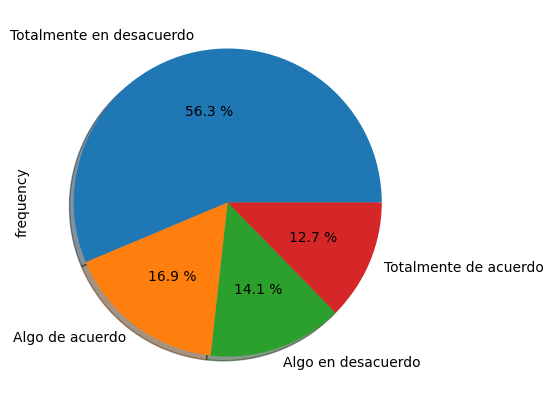

In [215]:
Filtro20_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")